## ROC Plot ##

In [96]:
# Import required modules
import sys
from pathlib import Path

In [97]:
# import project root into modules
project_root = str(Path.cwd().resolve().parent)
if project_root not in sys.path:
    sys.path.append(project_root)

In [98]:
from src.analysis import roc_plot
from src.analysis.efficiency_analysis import load_preprocessed_jobs_dataframe_from_duckdb
from src.config import enum_constants

# Automatically reload modules before executing code
%load_ext autoreload
# Reload all modules imported with %aimport every time before executing the Python code typed.
%autoreload 1
%aimport src.analysis.roc_plot, src.config.enum_constants

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [99]:
# load jobs df
loaded_df = load_preprocessed_jobs_dataframe_from_duckdb(db_path="../data/slurm_data_small.db")

Connected to ../data/slurm_data_small.db
Disconnected from ../data/slurm_data_small.db


In [100]:
# initilize the ROCVisualizer instance
roc_instance = roc_plot.ROCVisualizer(jobs_df=loaded_df)

# clip vram_constraint_efficiency to 1

# filter out CPU-only job
filtered_df = roc_instance.filter_jobs_for_analysis(gpu_mem_usage_filter={"min": 0, "inclusive": False})

# calcualted dataframe with metrics
roc_instance.calculate_all_efficiency_metrics(filtered_df)

# clip vram_constraint_efficiency to 1
roc_instance.jobs_with_efficiency_metrics["vram_constraint_efficiency"] \
    = roc_instance.jobs_with_efficiency_metrics["vram_constraint_efficiency"].clip(upper=1)



### Threshold: alloc_vram_efficiency ###

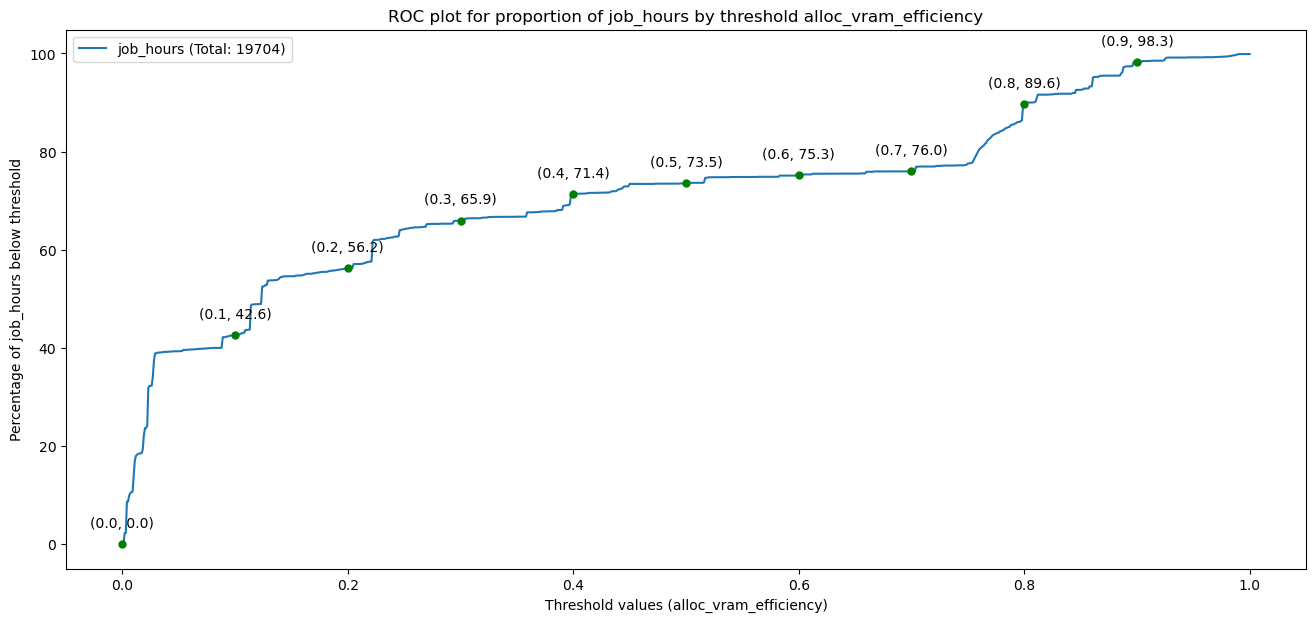

In [101]:
# roc_instance = roc_plot.ROCVisualizer(db_path="../data/slurm_data.db")
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY
proportion_metric = enum_constants.ProportionMetricsEnum.JOB_HOURS
fig, (axe1) = roc_instance.plot_roc_jobs(
    max_threshold=1.0, threshold_step=0.001, threshold_metric=threshold_metric, proportion_metric=proportion_metric
)

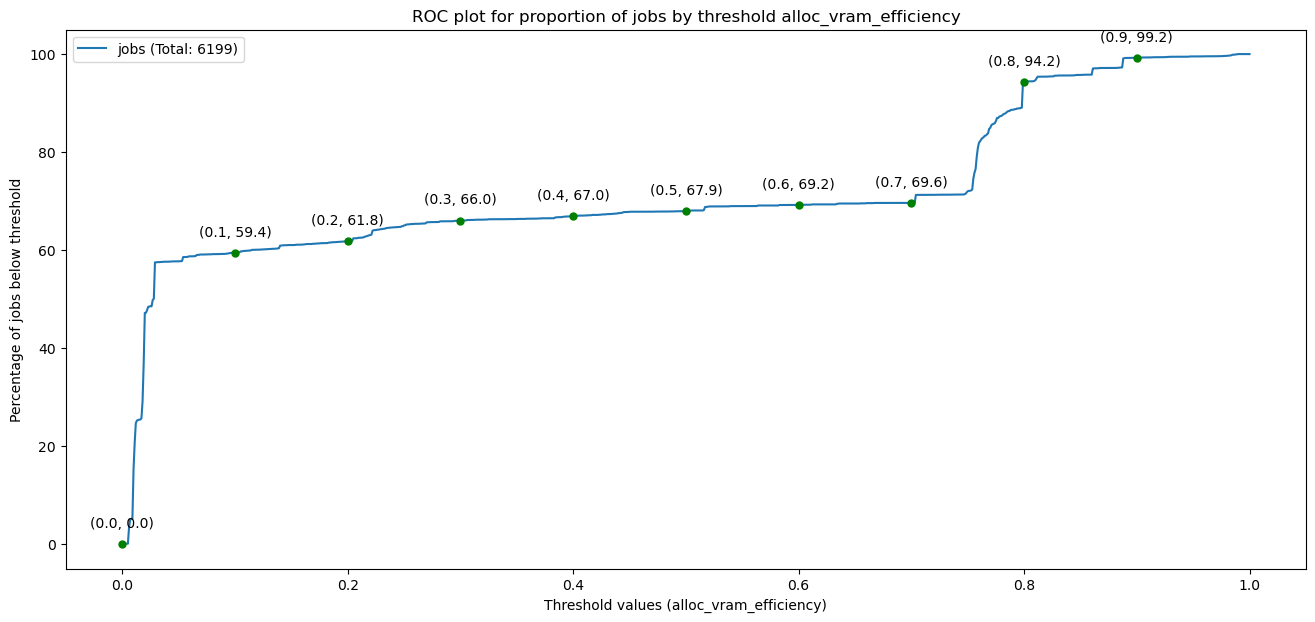

In [102]:
# plot number of jobs by percentage with regard to alloc_vram_effificient
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY
proportion_metric = enum_constants.ProportionMetricsEnum.JOBS
fig, (axe1) = roc_instance.plot_roc_jobs(
    min_threshold=0.0,
    max_threshold=1.0,
    threshold_step=0.001,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
    plot_percentage=True,
)

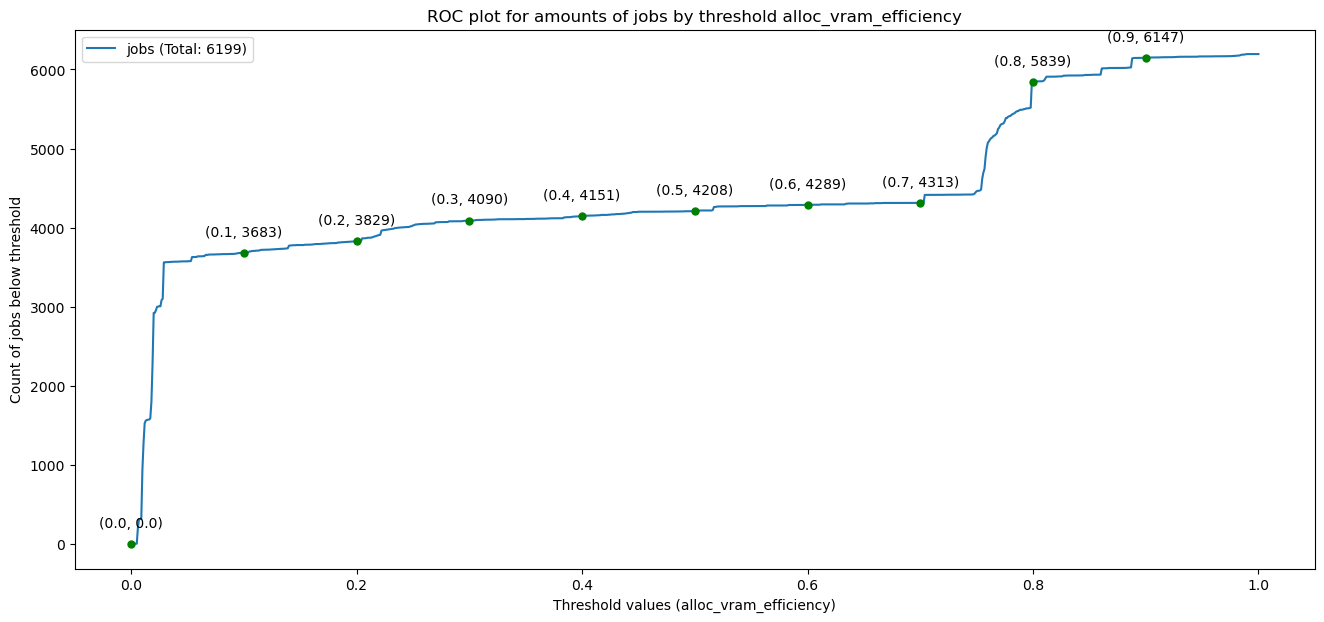

In [103]:
# plot raw numbers of jobs
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY
proportion_metric = enum_constants.ProportionMetricsEnum.JOBS
fig, (axe1) = roc_instance.plot_roc_jobs(
    max_threshold=1.0,
    threshold_step=0.001,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
    plot_percentage=False,
)

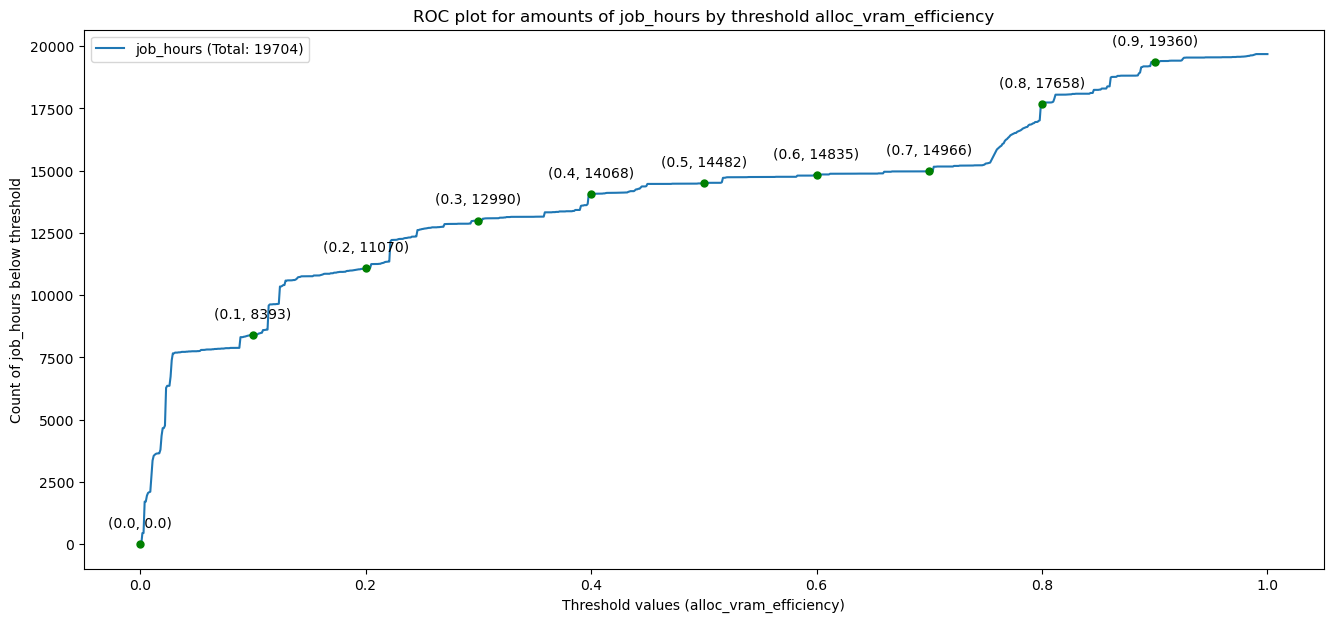

In [104]:
# plot raw number of job_hours
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY
proportion_metric = enum_constants.ProportionMetricsEnum.JOB_HOURS
fig, (axe1) = roc_instance.plot_roc_jobs(
    max_threshold=1.0,
    threshold_step=0.001,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
    plot_percentage=False,
)

### Threshold : vram_constraints_efficiency ###

Filtered out 2550 records with NaN or -inf values based on vram_constraint_efficiency column.


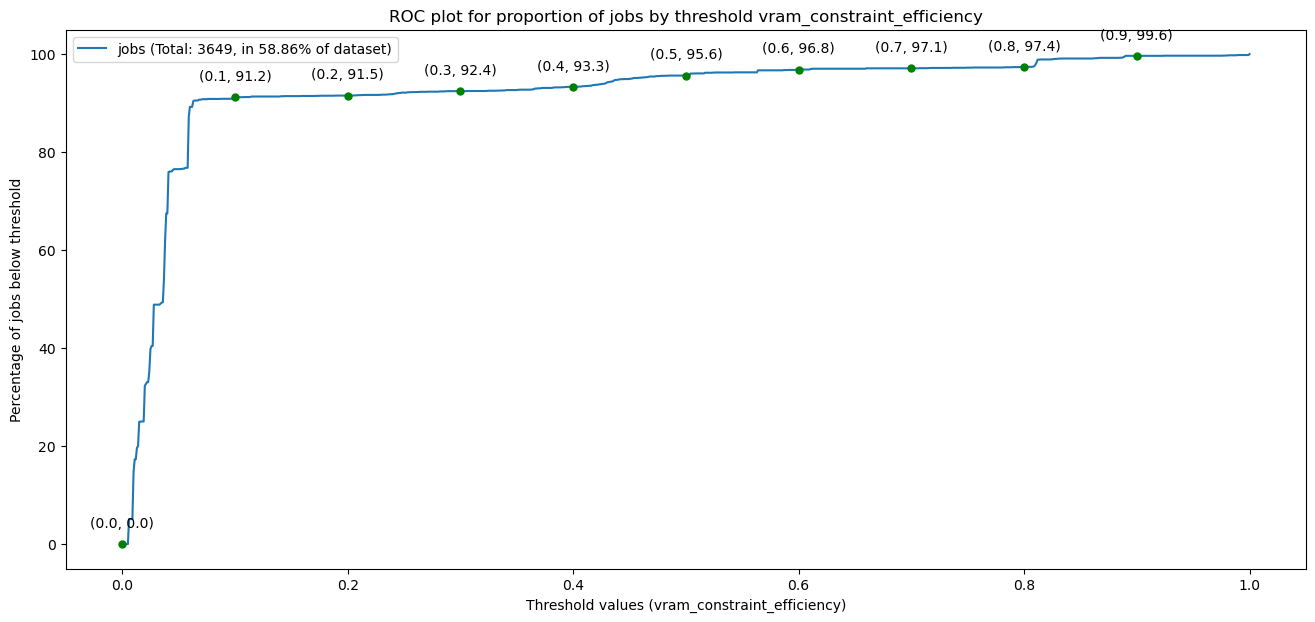

In [105]:
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.VRAM_CONSTRAINT_EFFICIENCY
proportion_metric = enum_constants.ProportionMetricsEnum.JOBS
fig, (axe1) = roc_instance.plot_roc_jobs(
    max_threshold=1.0, threshold_step=0.001, threshold_metric=threshold_metric, proportion_metric=proportion_metric
)

Filtered out 2550 records with NaN or -inf values based on vram_constraint_efficiency column.


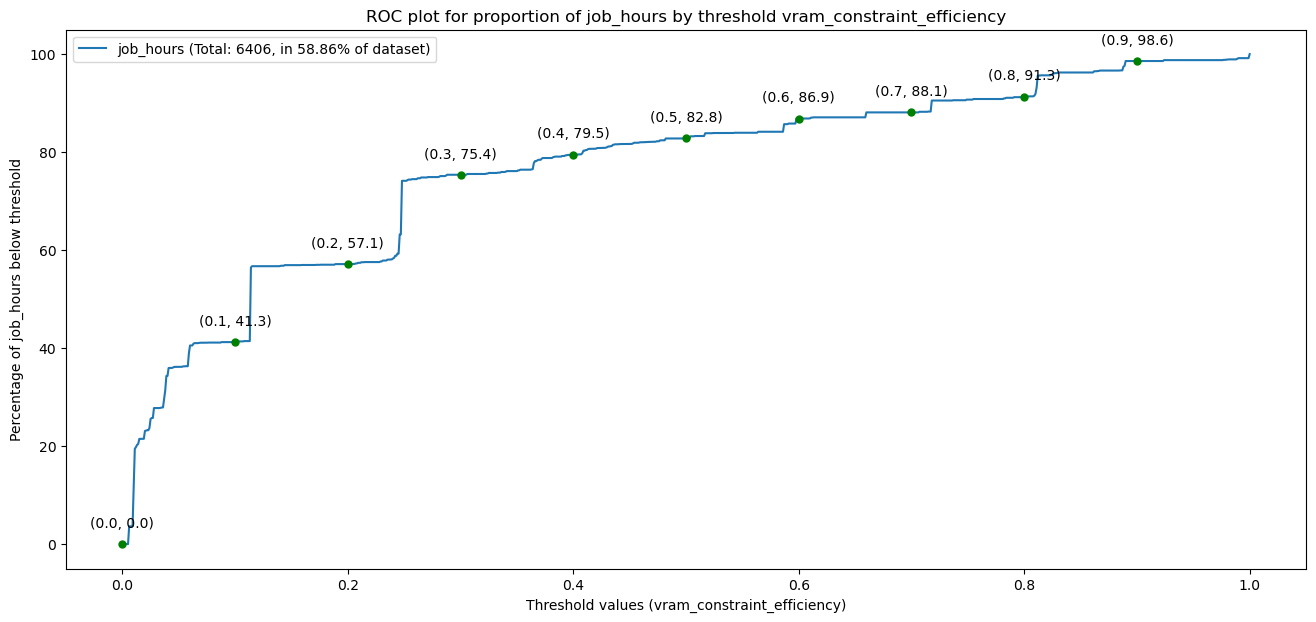

In [106]:
# plot raw number of job_hours
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.VRAM_CONSTRAINT_EFFICIENCY
proportion_metric = enum_constants.ProportionMetricsEnum.JOB_HOURS
fig, (axe1) = roc_instance.plot_roc_jobs(
    max_threshold=1.0,
    threshold_step=0.001,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
)

### Threshold : alloc_vram_efficiency_score ###

In [107]:
# # roc_instance = roc_plot.ROCVisualizer(db_path="../data/slurm_data.db")
# roc_instance = roc_plot.ROCVisualizer(db_path="../data/slurm_data.db")


Setting min_threshold to -925815.4587049824 based on data.


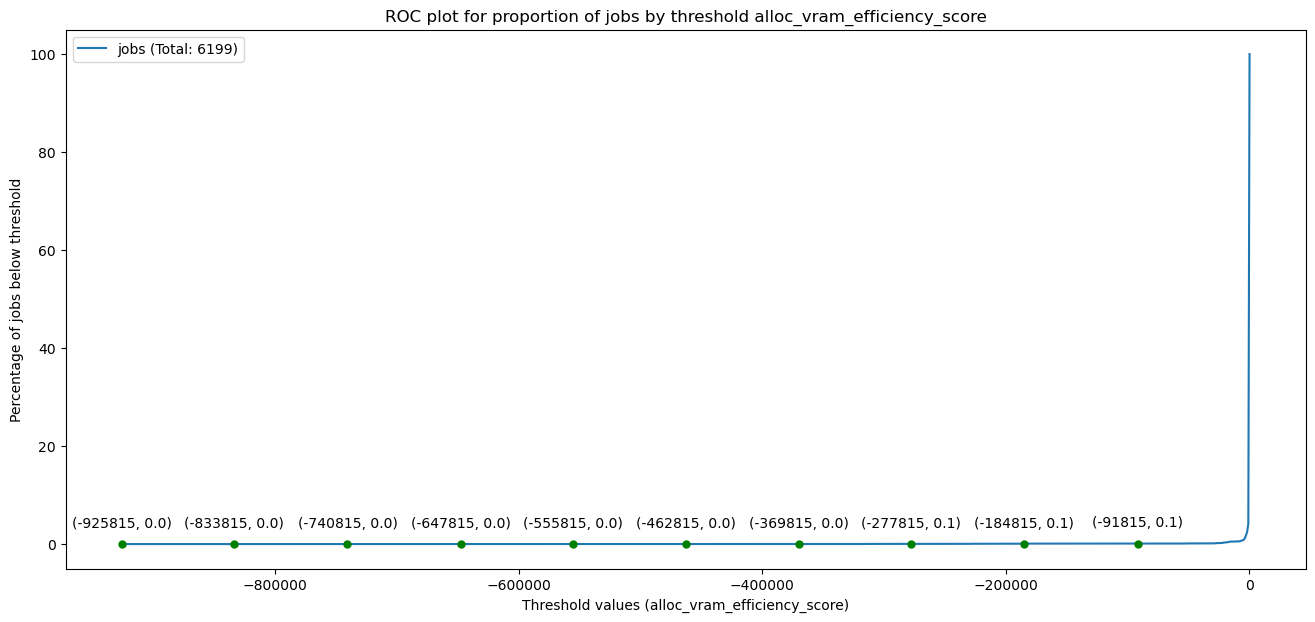

In [108]:
# for alloc_vram_efficiency_score, we need to adjust the min_threshold manually

threshold_metric = enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY_SCORE
proportion_metric = enum_constants.ProportionMetricsEnum.JOBS
fig, (axe1) = roc_instance.plot_roc_jobs(
    max_threshold=0.0,
    threshold_step=1000,
    # min_threshold=-10000.0,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
)

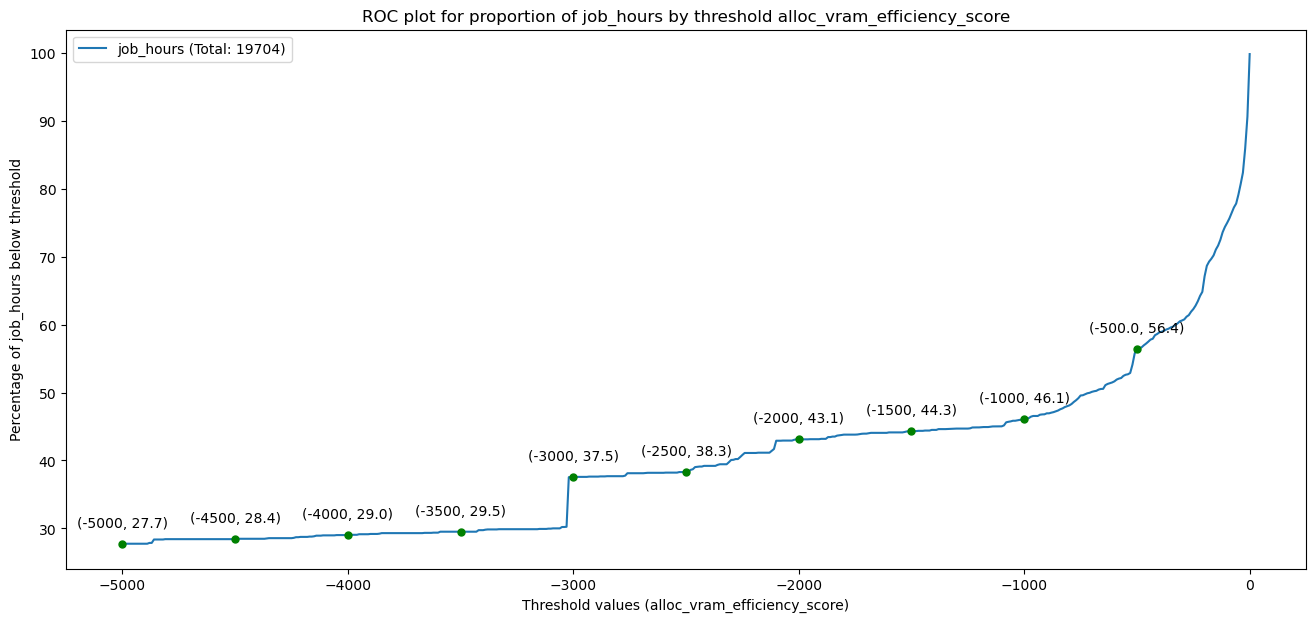

In [109]:
# for alloc_vram_efficiency_score, we need to adjust the min_threshold manually

# plot raw number of job_hours
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY_SCORE
proportion_metric = enum_constants.ProportionMetricsEnum.JOB_HOURS
fig, (axe1) = roc_instance.plot_roc_jobs(
    min_threshold=-5000,
    max_threshold=0.0,
    threshold_step=10,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
)

### Threhold metric: Job_hour & vram_hour (For number of jobs only) ###

In [110]:
print(roc_instance.jobs_with_efficiency_metrics["job_hours"].mean())
print(roc_instance.jobs_with_efficiency_metrics["job_hours"].std())
print(roc_instance.jobs_with_efficiency_metrics["job_hours"].max())
print(roc_instance.jobs_with_efficiency_metrics["job_hours"].min())

3.1785987435249408
24.12003105028457
1248.0011111111112
0.16666666666666666


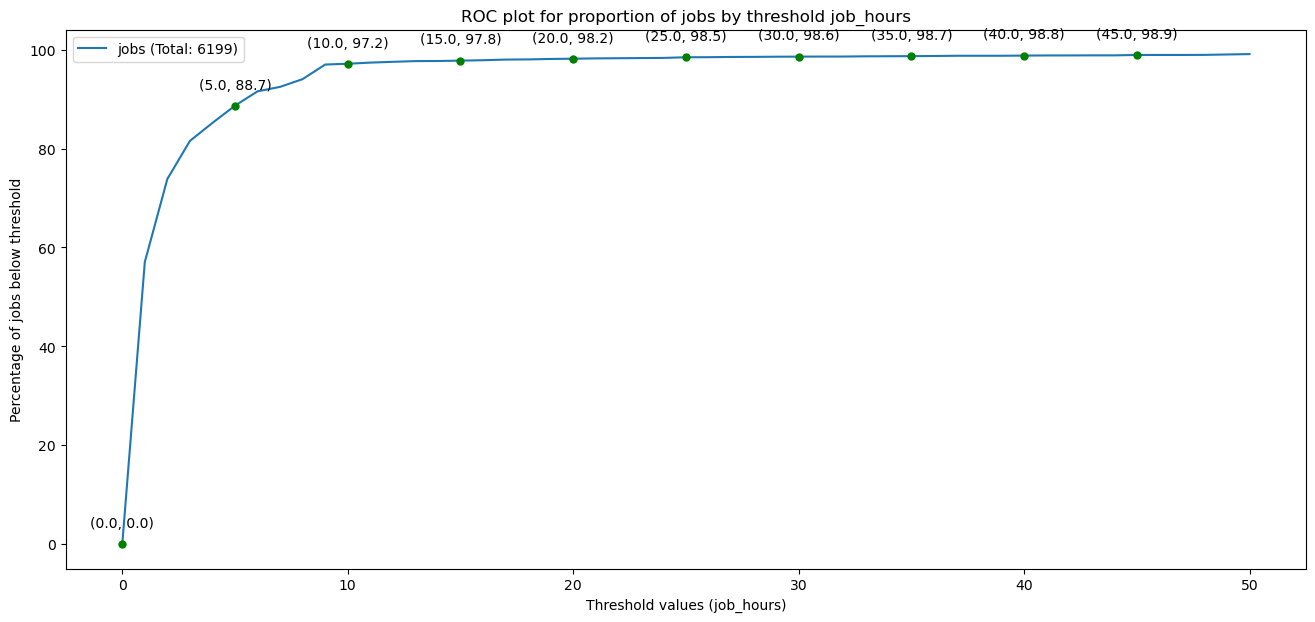

In [111]:
# for alloc_vram_efficiency_score, we need to adjust the min_threshold manually

# plot raw number of job_hours
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.JOB_HOURS
proportion_metric = enum_constants.ProportionMetricsEnum.JOBS
max_job_hour = roc_instance.jobs_with_efficiency_metrics["job_hours"].max()
fig, (axe1) = roc_instance.plot_roc_jobs(
    # min_threshold=-200000,
    min_threshold=0.0,
    max_threshold=50,
    threshold_step=1,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
)

In [112]:
print(roc_instance.jobs_with_efficiency_metrics["vram_hours"].mean())
print(roc_instance.jobs_with_efficiency_metrics["vram_hours"].std())
print(roc_instance.jobs_with_efficiency_metrics["vram_hours"].max())
print(roc_instance.jobs_with_efficiency_metrics["vram_hours"].min())

289.4885597139324
6101.746221379882
442760.5333333334
1.8333333333333333


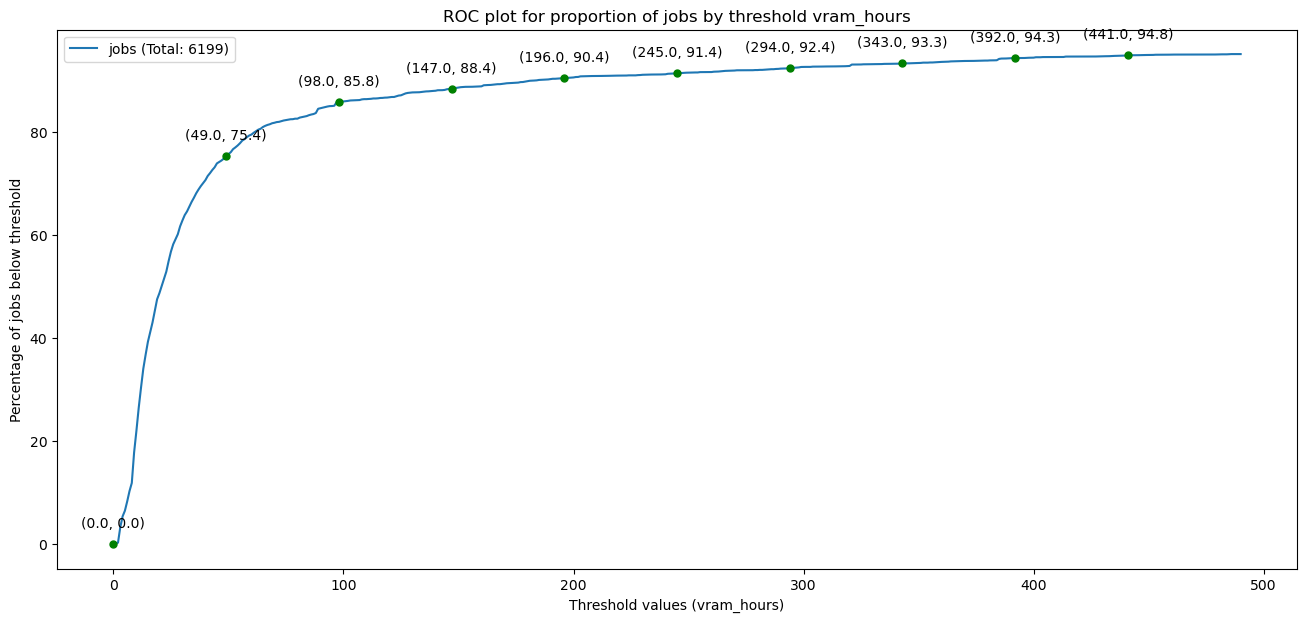

In [113]:
# for alloc_vram_efficiency_score, we need to adjust the min_threshold manually

# plot raw number of job_hours
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.VRAM_HOURS
proportion_metric = enum_constants.ProportionMetricsEnum.JOBS
max_job_hour = roc_instance.jobs_with_efficiency_metrics["job_hours"].max()
fig, (axe1) = roc_instance.plot_roc_jobs(
    # min_threshold=-200000,
    min_threshold=0.0,
    max_threshold=490,
    threshold_step=1,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
)

### Proportion metric : User ###

In [114]:
null_alloc_vram_efficiency_score = roc_instance.jobs_with_efficiency_metrics[
    roc_instance.jobs_with_efficiency_metrics["alloc_vram_efficiency"].isna()
]

print(
    null_alloc_vram_efficiency_score[
        ["used_vram_gib", "allocated_vram", "alloc_vram_efficiency", "Partition", "GPUType"]
    ]
)

Empty DataFrame
Columns: [used_vram_gib, allocated_vram, alloc_vram_efficiency, Partition, GPUType]
Index: []


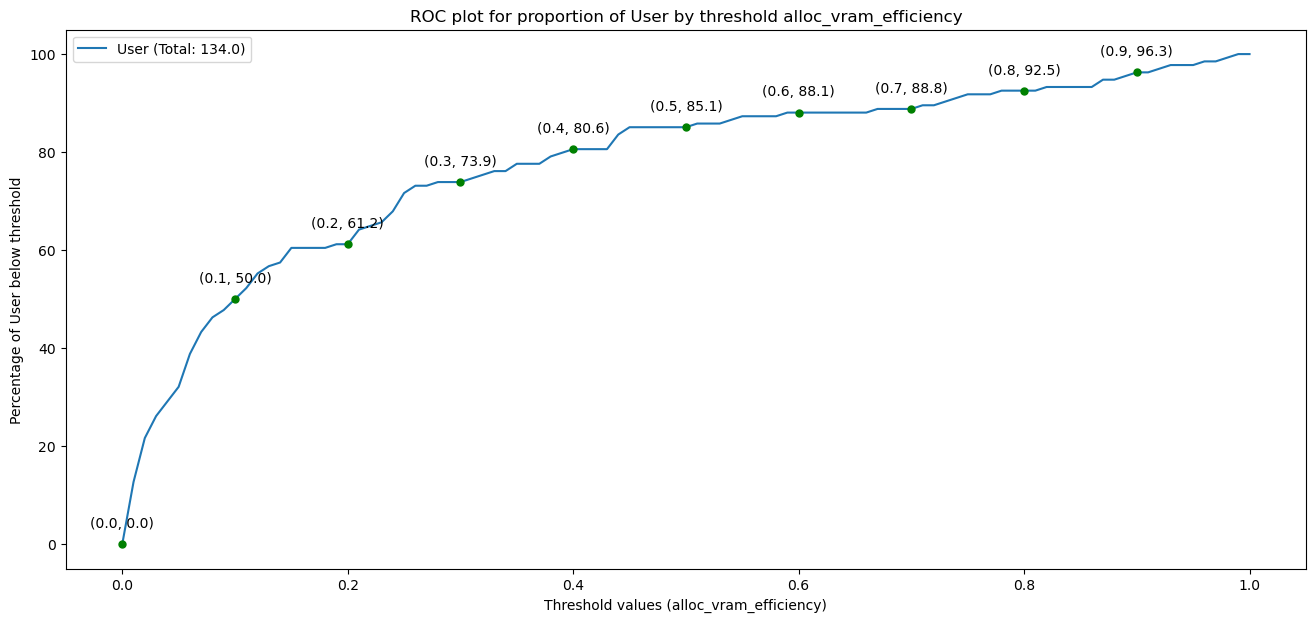

In [115]:
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY
proportion_metric = enum_constants.ProportionMetricsEnum.USER
fig, (axe1) = roc_instance.plot_roc_jobs(
    min_threshold=0.0,
    threshold_step=0.01,
    max_threshold=1.0,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
    plot_percentage=True,
)

In [116]:
user_with_all_vram_score_null = (
    roc_instance.jobs_with_efficiency_metrics.groupby("User")["vram_constraint_efficiency"]
    .apply(lambda x: x.isnull().all())
    .sum()
)
user_with_all_vram_score_null

np.int64(93)

Filtered out 2550 records with NaN or -inf values based on vram_constraint_efficiency column.


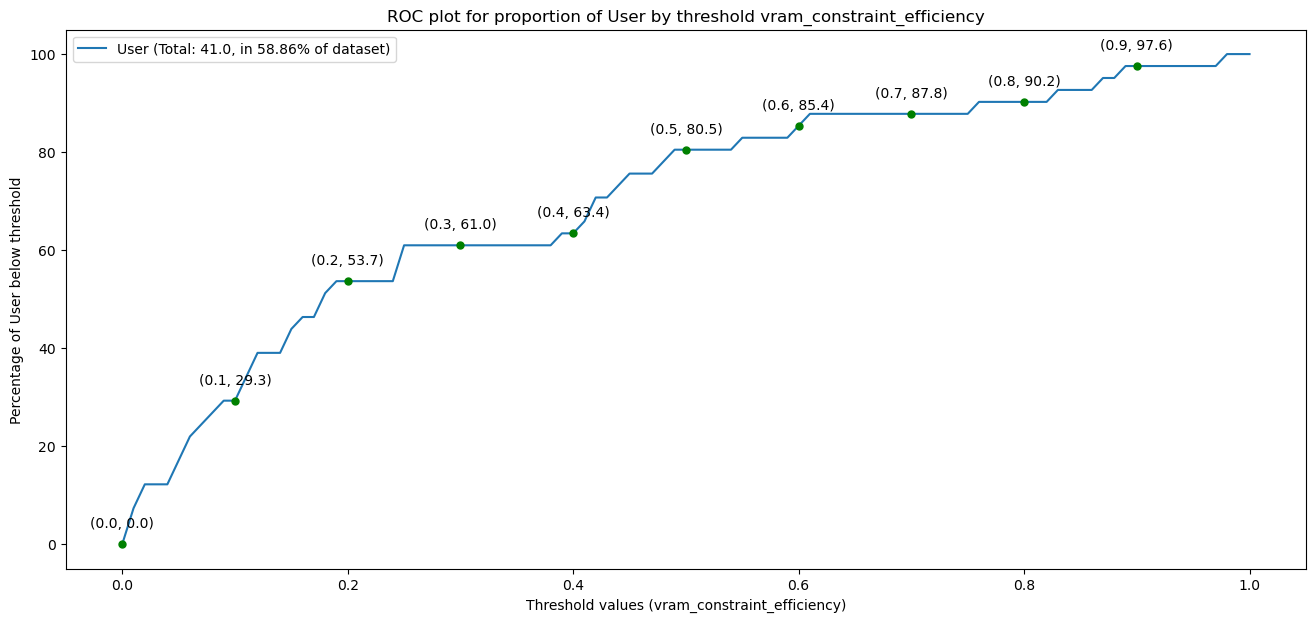

In [117]:
# plot raw number of job_hours
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.VRAM_CONSTRAINT_EFFICIENCY
proportion_metric = enum_constants.ProportionMetricsEnum.USER
fig, (axe1) = roc_instance.plot_roc_jobs(
    min_threshold=0.0,
    threshold_step=0.01,
    max_threshold=1.0,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
)

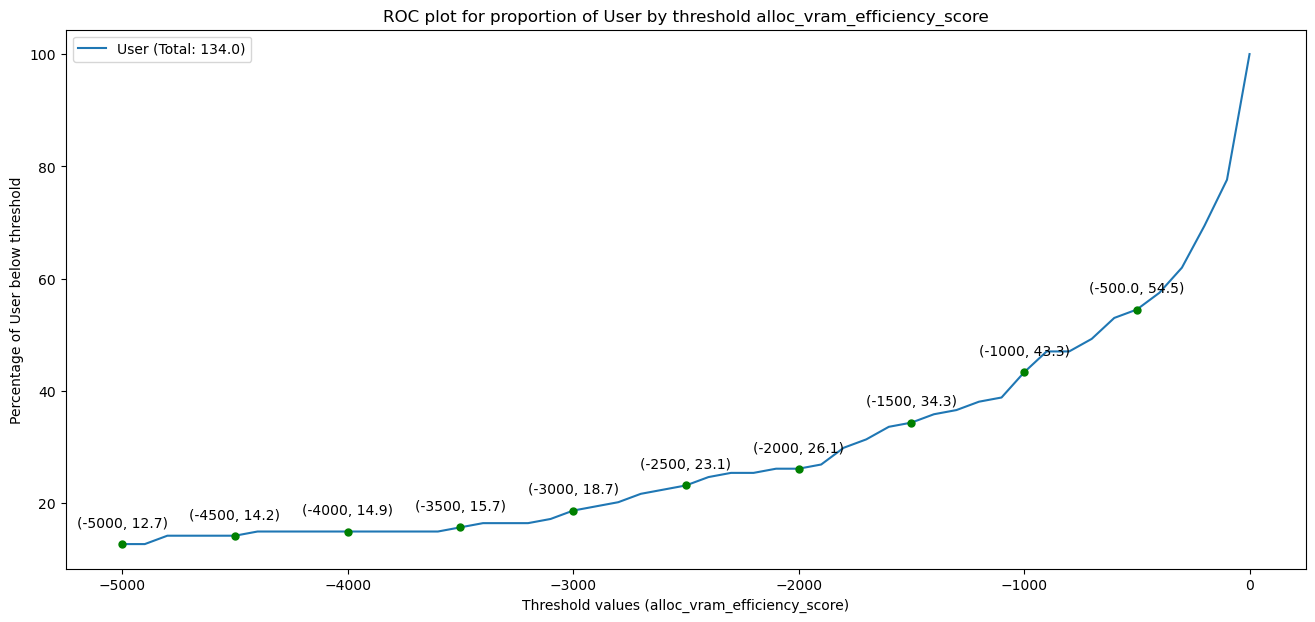

In [118]:
# plot raw number of job_hours
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY_SCORE
proportion_metric = enum_constants.ProportionMetricsEnum.USER
fig, (axe1) = roc_instance.plot_roc_jobs(
    max_threshold=0.0,
    threshold_step=100,
    min_threshold=-5000.0,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
)

### Proportion Metrics: PI_GROUP ###

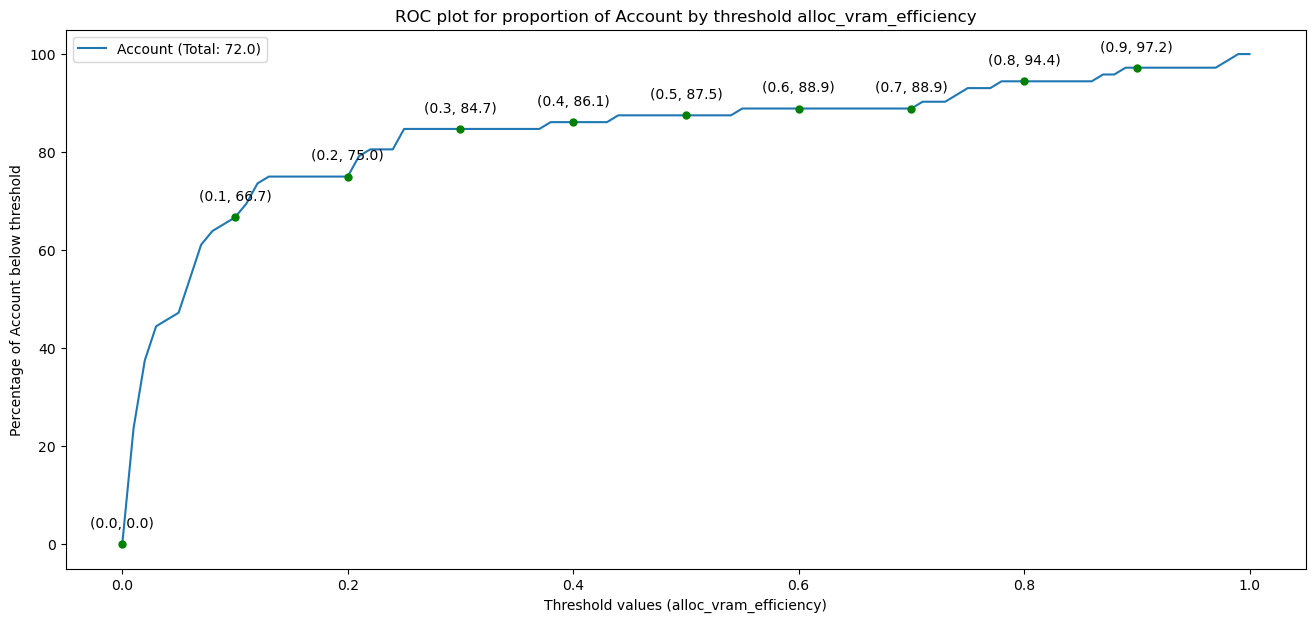

In [119]:
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY
proportion_metric = enum_constants.ProportionMetricsEnum.PI_GROUP
fig, (axe1) = roc_instance.plot_roc_jobs(
    min_threshold=0.0,
    threshold_step=0.01,
    max_threshold=1.0,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
)

In [120]:
temp = (
    roc_instance.jobs_with_efficiency_metrics.groupby("Account", observed=True)["vram_constraint_efficiency"]
    .apply(lambda x: x.isnull().all())
    .sum()
)
temp

np.int64(42)

Filtered out 2550 records with NaN or -inf values based on vram_constraint_efficiency column.


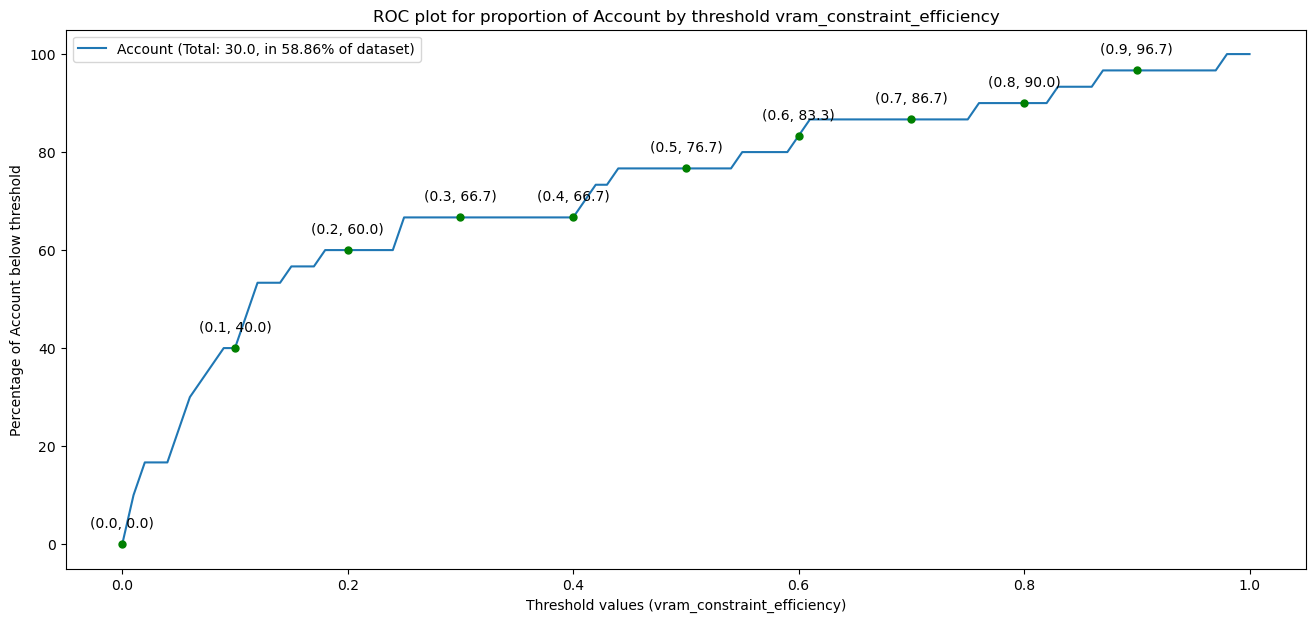

In [121]:
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.VRAM_CONSTRAINT_EFFICIENCY
proportion_metric = enum_constants.ProportionMetricsEnum.PI_GROUP
fig, (axe1) = roc_instance.plot_roc_jobs(
    min_threshold=0.0,
    threshold_step=0.01,
    max_threshold=1.0,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
)

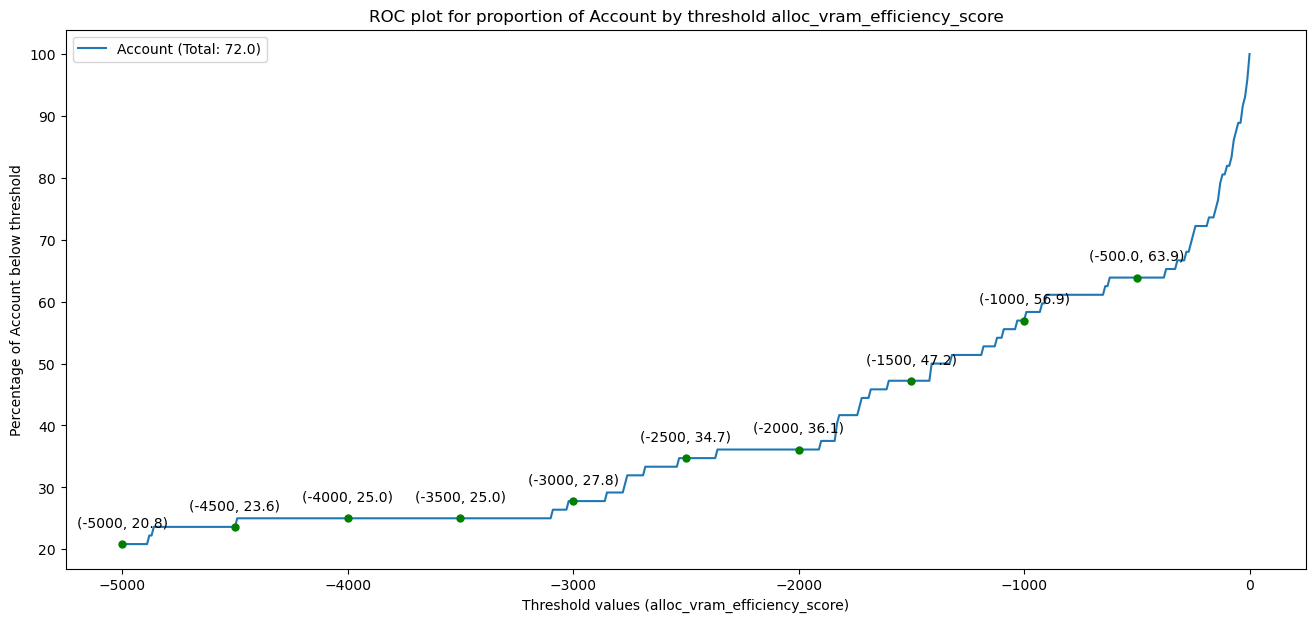

In [122]:
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY_SCORE
proportion_metric = enum_constants.ProportionMetricsEnum.PI_GROUP
fig, (axe1) = roc_instance.plot_roc_jobs(
    max_threshold=0.0,
    threshold_step=10,
    min_threshold=-5000.0,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
)

### Proportion Metrics: VRAM_HOURS ###

Filtered out 2550 records with NaN or -inf values based on vram_constraint_efficiency column.


(<Figure size 1600x700 with 1 Axes>,
 [<Axes: title={'center': 'ROC plot for proportion of vram_hours by threshold vram_constraint_efficiency'}, xlabel='Threshold values (vram_constraint_efficiency)', ylabel='Percentage of vram_hours below threshold'>])

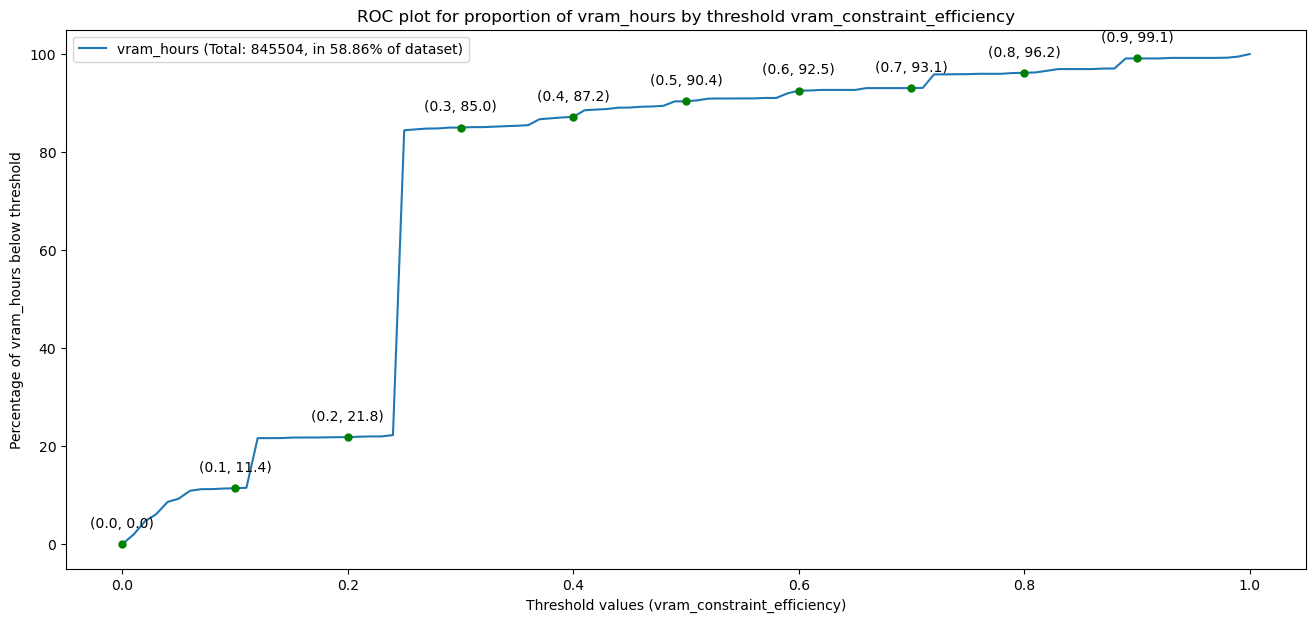

In [123]:
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.VRAM_CONSTRAINT_EFFICIENCY
proportion_metric = enum_constants.ProportionMetricsEnum.VRAM_HOURS

roc_instance.plot_roc_jobs(
    min_threshold=0.0,
    max_threshold=1.0,
    threshold_step=0.01,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
)


(<Figure size 1600x700 with 1 Axes>,
 [<Axes: title={'center': 'ROC plot for proportion of vram_hours by threshold alloc_vram_efficiency'}, xlabel='Threshold values (alloc_vram_efficiency)', ylabel='Percentage of vram_hours below threshold'>])

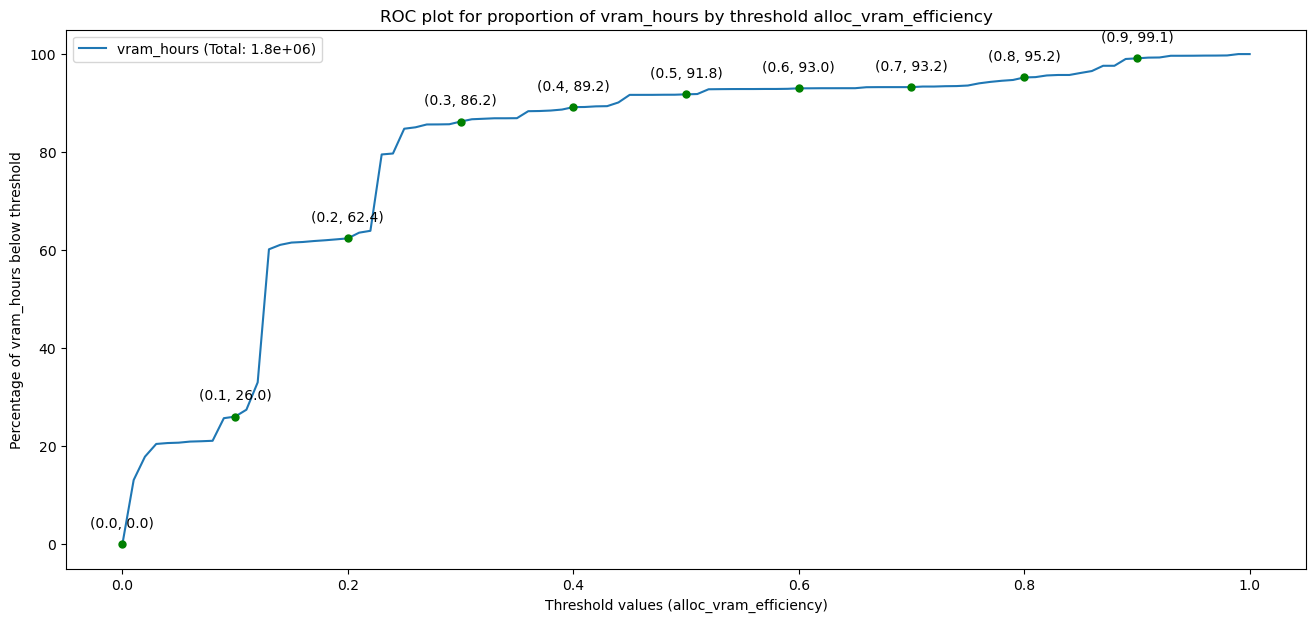

In [124]:
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY
proportion_metric = enum_constants.ProportionMetricsEnum.VRAM_HOURS

roc_instance.plot_roc_jobs(
    min_threshold=0.0,
    max_threshold=1.0,
    threshold_step=0.01,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
)


Setting min_threshold to -925815.4587049824 based on data.


(<Figure size 1600x700 with 1 Axes>,
 [<Axes: title={'center': 'ROC plot for proportion of vram_hours by threshold alloc_vram_efficiency_score'}, xlabel='Threshold values (alloc_vram_efficiency_score)', ylabel='Percentage of vram_hours below threshold'>])

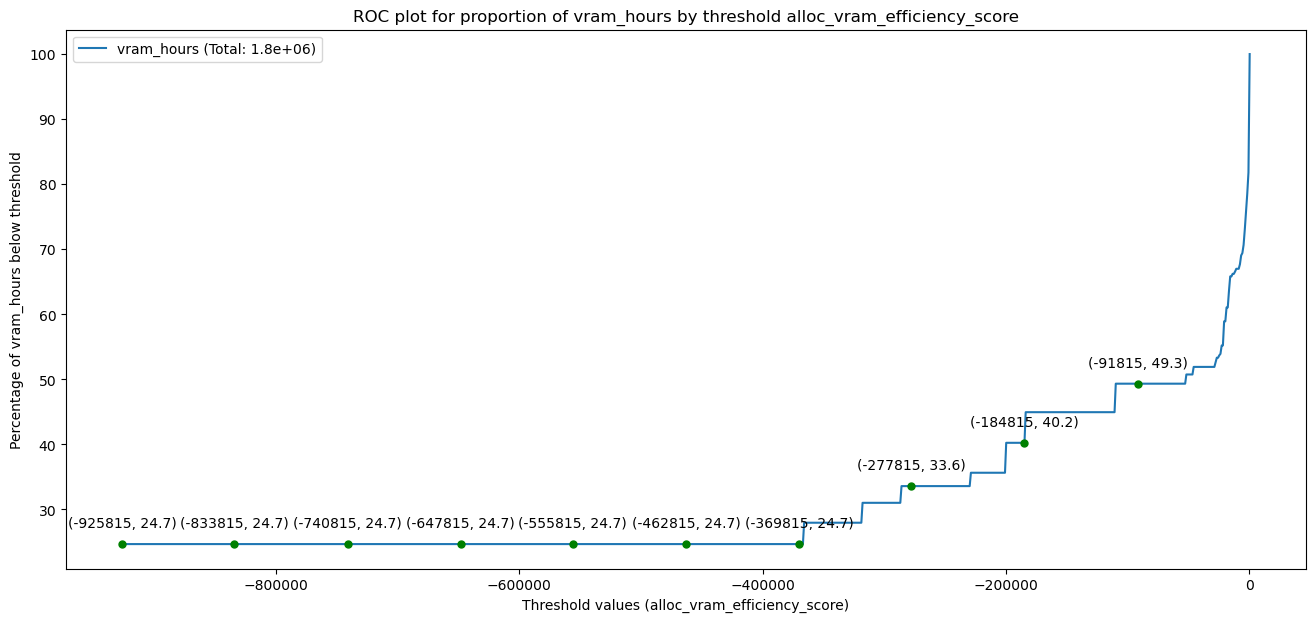

In [125]:
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY_SCORE
proportion_metric = enum_constants.ProportionMetricsEnum.VRAM_HOURS

roc_instance.plot_roc_jobs(
    max_threshold=0.0,
    # min_threshold=-200000.0,
    threshold_step=1000,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
)


## Multiple line plot by user ###

#### Inspect 6 users who submitted the highest number of jobs ####

In [126]:
top_user_with_job_count = (
    roc_instance.jobs_with_efficiency_metrics.groupby("User")
    .agg(job_count=("JobID", "count"), user_job_hours=("job_hours", "sum"))
    .reset_index()
    .sort_values(by="job_count")
    .tail(6)
)
print(top_user_with_job_count)

                      User  job_count  user_job_hours
66        limr_iastate_edu        131      571.703611
122   yekyungkim_umass_edu        137     1040.798889
12   allen_yang001_umb_edu        429        813.0625
39     emccleary_umass_edu        886     1293.139722
54     joohwanko_umass_edu       1066     1795.160278
82        pchien_umass_edu       2423     1292.547778


(<Figure size 1600x600 with 1 Axes>,
 [<Axes: title={'center': 'Multple line ROC plot (User) for amounts of jobs by threshold alloc_vram_efficiency'}, xlabel='Threshold values (alloc_vram_efficiency)', ylabel='Count of jobs below threshold'>])

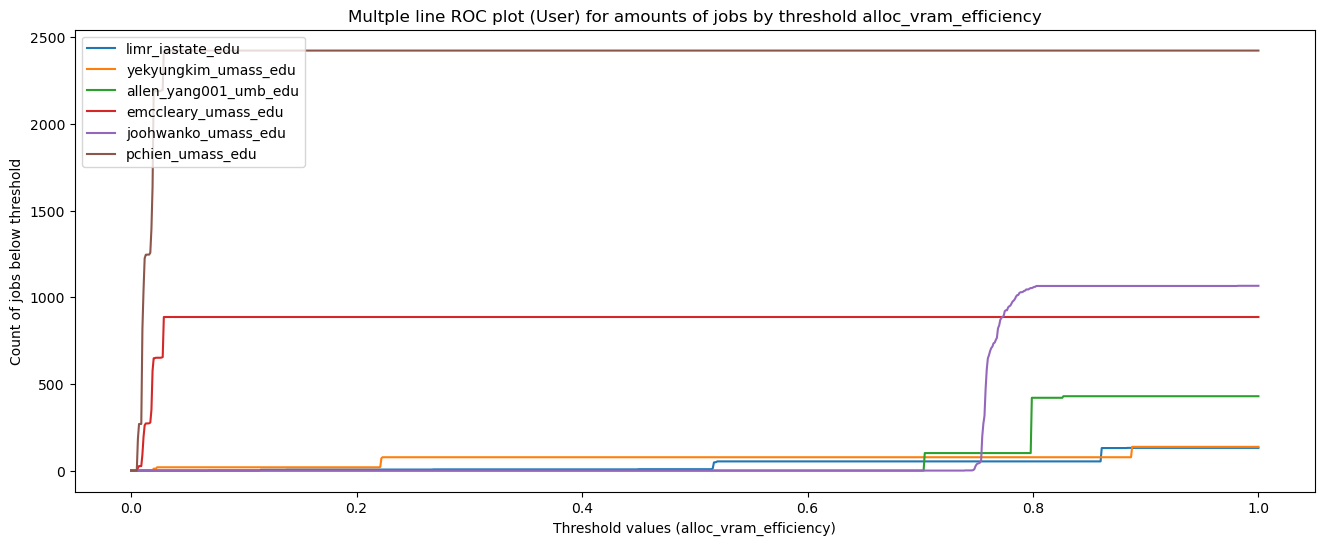

In [127]:
from src.config.enum_constants import ProportionMetricsEnum, JobEfficiencyMetricsEnum

roc_instance.multiple_line_roc_plot(
    plot_object_list=list(top_user_with_job_count["User"].to_numpy()),
    object_column_type=ProportionMetricsEnum.USER,
    threshold_metric=JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY,
    proportion_metric=ProportionMetricsEnum.JOBS,
    min_threshold=0.0,
    max_threshold=1.0,
    threshold_step=0.001,
    plot_percentage=False,
)

Amount of entries whose alloc_vram_efficiency_score is -inf : 0


(<Figure size 1600x600 with 1 Axes>,
 [<Axes: title={'center': 'Multple line ROC plot (User) for amounts of jobs by threshold alloc_vram_efficiency_score'}, xlabel='Threshold values (alloc_vram_efficiency_score)', ylabel='Count of jobs below threshold'>])

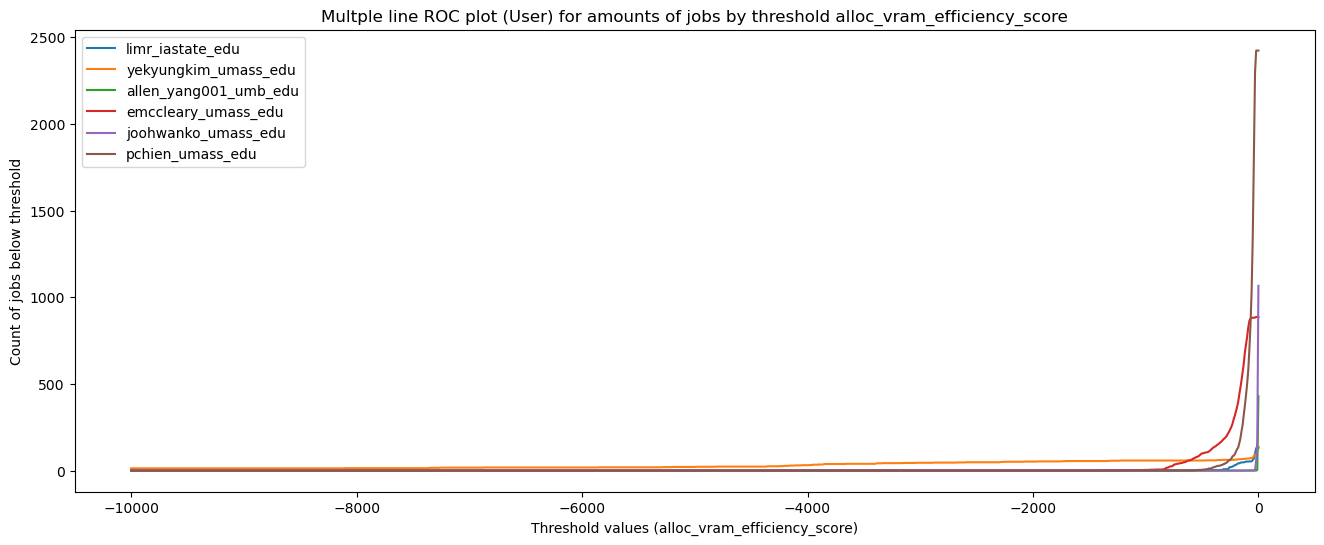

In [128]:
roc_instance.multiple_line_roc_plot(
    plot_object_list=list(top_user_with_job_count["User"].to_numpy()),
    object_column_type=ProportionMetricsEnum.USER,
    threshold_metric=JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY_SCORE,
    proportion_metric=ProportionMetricsEnum.JOBS,
    min_threshold=-10000,
    max_threshold=0.0,
    threshold_step=10,
    plot_percentage=False,
)

Amount of entries whose vram_constraint_efficiency is null: 2550


(<Figure size 1600x600 with 1 Axes>,
 [<Axes: title={'center': 'Multple line ROC plot (User) for amounts of jobs by threshold vram_constraint_efficiency'}, xlabel='Threshold values (vram_constraint_efficiency)', ylabel='Count of jobs below threshold'>])

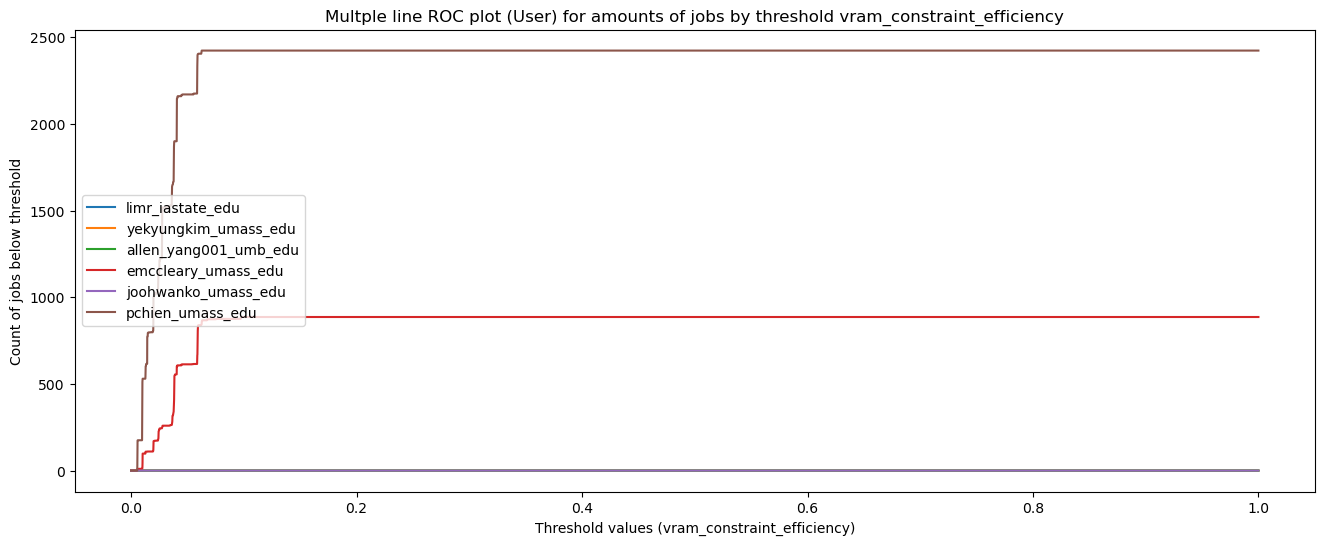

In [129]:
from src.config.enum_constants import ProportionMetricsEnum, JobEfficiencyMetricsEnum

roc_instance.multiple_line_roc_plot(
    plot_object_list=list(top_user_with_job_count["User"].to_numpy()),
    # plot_object_list=['dosterman_umass_edu'],
    object_column_type=ProportionMetricsEnum.USER,
    threshold_metric=JobEfficiencyMetricsEnum.VRAM_CONSTRAINT_EFFICIENCY,
    plot_percentage=False,
    max_threshold=1.0,
    min_threshold=0.0,
    threshold_step=0.0001,
)

In [130]:
# Inspect an outliner
cur_df = roc_instance.jobs_with_efficiency_metrics.copy()
filtered = cur_df[cur_df["User"] == "dosterman_umass_edu"].copy()
group = (
    filtered.groupby("User")
    .agg(
        job_count=("JobID", "count"),
        job_hours=("job_hours", "sum"),
        vram_efficiency_score=(JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY.value, "sum"),
        allocated_vram=("allocated_vram", "sum"),
        used_vram=("used_vram_gib", "sum"),
    )
    .reset_index()
)
print(group)

Empty DataFrame
Columns: [User, job_count, job_hours, vram_efficiency_score, allocated_vram, used_vram]
Index: []


#### Inspect the 6 users with highest number of job_hours ####

In [131]:
top_user_by_job_hour = (
    roc_instance.jobs_with_efficiency_metrics.groupby("User")
    .agg(job_count=("JobID", "count"), job_hours=("job_hours", "sum"))
    .reset_index()
    .sort_values(by="job_hours")
    .tail(6)
)
print(top_user_by_job_hour)

                          User  job_count    job_hours
122       yekyungkim_umass_edu        137  1040.798889
82            pchien_umass_edu       2423  1292.547778
39         emccleary_umass_edu        886  1293.139722
8        achyut_subedi_uri_edu          7  1325.648889
50   jacob_adamczyk001_umb_edu         25  1680.179167
54         joohwanko_umass_edu       1066  1795.160278


Amount of entries whose vram_constraint_efficiency is null: 2550


(<Figure size 1600x600 with 1 Axes>,
 [<Axes: title={'center': 'Multple line ROC plot (User) for amounts of job_hours by threshold vram_constraint_efficiency'}, xlabel='Threshold values (vram_constraint_efficiency)', ylabel='Count of job_hours below threshold'>])

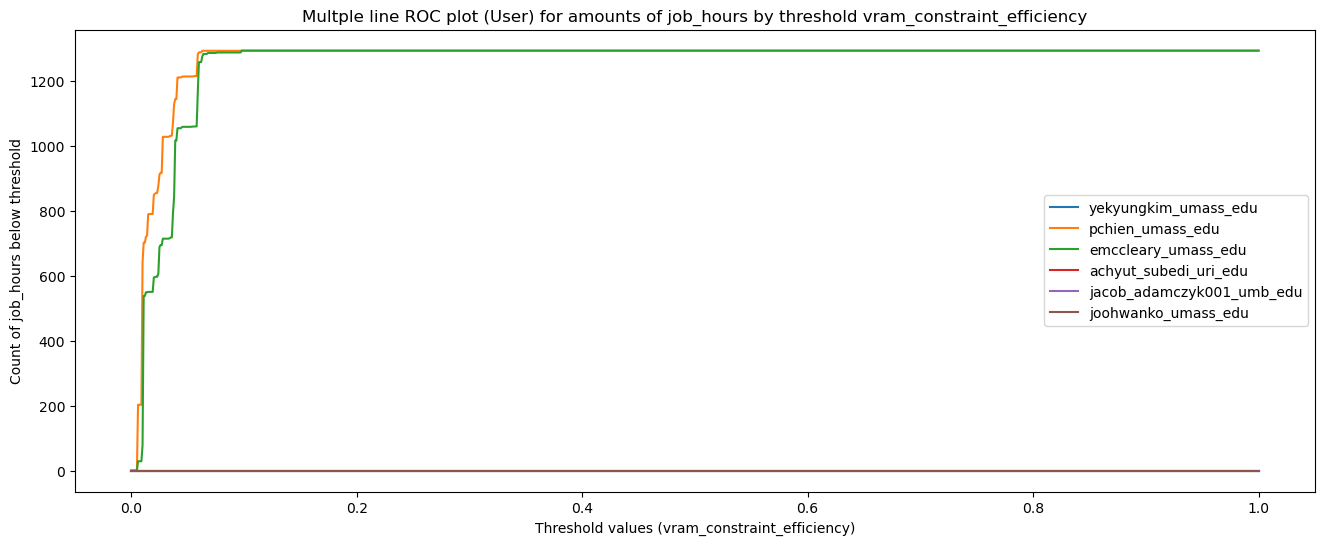

In [132]:
roc_instance.multiple_line_roc_plot(
    plot_object_list=top_user_by_job_hour["User"].to_list(),
    object_column_type=ProportionMetricsEnum.USER,
    threshold_metric=JobEfficiencyMetricsEnum.VRAM_CONSTRAINT_EFFICIENCY,
    proportion_metric=ProportionMetricsEnum.JOB_HOURS,
    min_threshold=0.0,
    max_threshold=1.0,
    threshold_step=0.001,
    plot_percentage=False,
)

(<Figure size 1600x600 with 1 Axes>,
 [<Axes: title={'center': 'Multple line ROC plot (User) for amounts of job_hours by threshold alloc_vram_efficiency'}, xlabel='Threshold values (alloc_vram_efficiency)', ylabel='Count of job_hours below threshold'>])

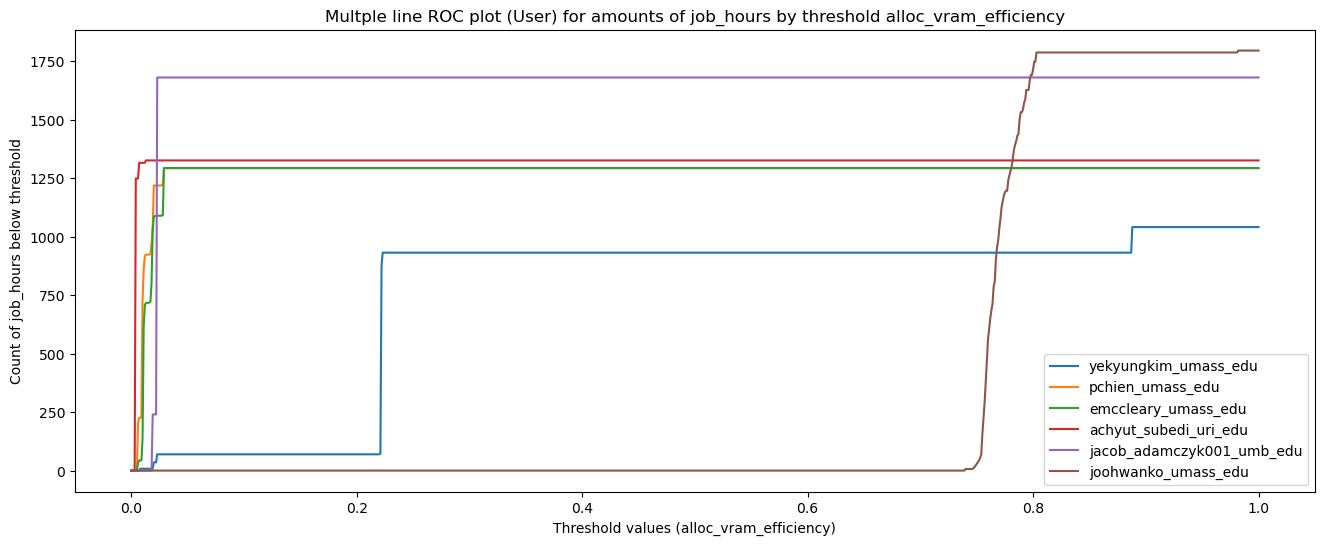

In [133]:
roc_instance.multiple_line_roc_plot(
    plot_object_list=top_user_by_job_hour["User"].to_list(),
    object_column_type=ProportionMetricsEnum.USER,
    threshold_metric=JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY,
    proportion_metric=ProportionMetricsEnum.JOB_HOURS,
    min_threshold=0.0,
    max_threshold=1.0,
    threshold_step=0.001,
    plot_percentage=False,
)

### Multiple plot ROC by PI Group ###

In [134]:
# from src.analysis.roc_plot import ROCVisualizer

# roc_instance = ROCVisualizer(db_path="../data/slurm_data.db")

In [135]:
from src.config.enum_constants import ProportionMetricsEnum, JobEfficiencyMetricsEnum

cur_df = roc_instance.jobs_with_efficiency_metrics
top_pi_group_job_counts = (
    cur_df.groupby(ProportionMetricsEnum.PI_GROUP.value)
    .agg(job_count=("JobID", "count"), job_hours=("job_hours", "sum"))
    .reset_index()
    .sort_values(by="job_count")
    .tail(6)
)
top_pi_group_job_counts

/var/folders/fk/pzwkjjt962zdq9cqb2t9lz7m0000gn/T/ipykernel_71792/2120321704.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cur_df.groupby(ProportionMetricsEnum.PI_GROUP.value)


,Account,job_count,job_hours
81,pi_zhuzhang_uri_edu,131,571.703611
6,pi_miyyer_umass_edu,217,1521.371667
12,pi_bo_sheng_umb_edu,429,813.0625
54,pi_bioch642_umass_edu,886,1293.139722
98,pi_jdomke_umass_edu,1066,1795.160278
25,pi_pchien_umass_edu,2423,1292.547778


(<Figure size 1600x600 with 1 Axes>,
 [<Axes: title={'center': 'Multple line ROC plot (Account) for amounts of jobs by threshold alloc_vram_efficiency'}, xlabel='Threshold values (alloc_vram_efficiency)', ylabel='Count of jobs below threshold'>])

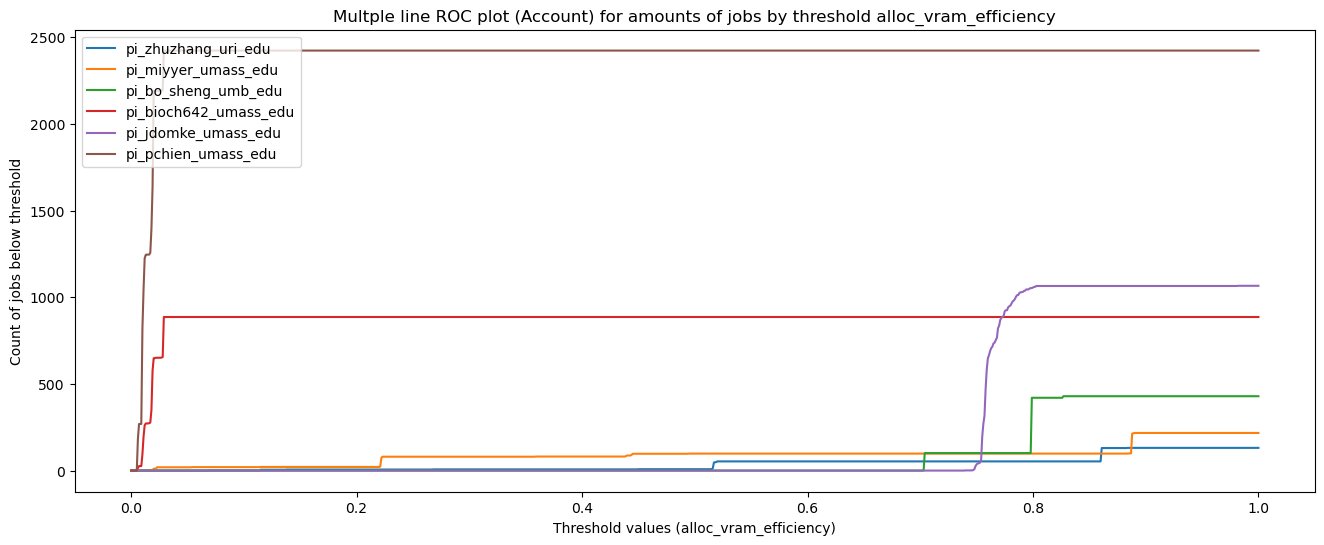

In [136]:
roc_instance.multiple_line_roc_plot(
    plot_object_list=list(top_pi_group_job_counts[ProportionMetricsEnum.PI_GROUP.value].to_numpy()),
    object_column_type=ProportionMetricsEnum.PI_GROUP,
    max_threshold=1.0,
    min_threshold=0.0,
    threshold_step=0.001,
    plot_percentage=False,
)

Amount of entries whose alloc_vram_efficiency_score is -inf : 0


(<Figure size 1600x600 with 1 Axes>,
 [<Axes: title={'center': 'Multple line ROC plot (Account) for amounts of jobs by threshold alloc_vram_efficiency_score'}, xlabel='Threshold values (alloc_vram_efficiency_score)', ylabel='Count of jobs below threshold'>])

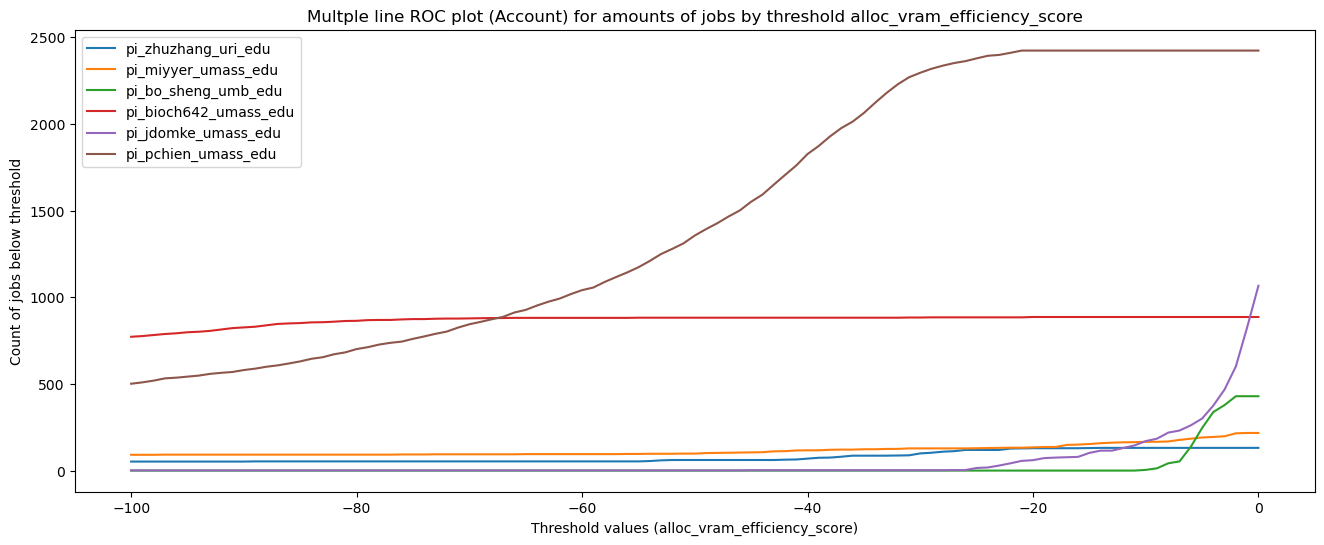

In [137]:
roc_instance.multiple_line_roc_plot(
    plot_object_list=list(top_pi_group_job_counts[ProportionMetricsEnum.PI_GROUP.value].to_numpy()),
    object_column_type=ProportionMetricsEnum.PI_GROUP,
    threshold_metric=JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY_SCORE,
    max_threshold=0.0,
    min_threshold=-100.0,
    threshold_step=1.0,
    plot_percentage=False,
)